<a href="https://colab.research.google.com/github/RizwanMunawar/Cats-Vs-Dogs-Classification-CNN-Data-Augmentation/blob/master/Cats_Vs_Dogs_Classification_Using_CNN_and_Data_Augmentation_My_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CATS VS DOGS CLASSIFICATION USING DEEP LEARNING/CNN,DATA AUGMENTATION AND DROPOUT**

####Importing Libraries

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Download and Store Data

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL,extract = True)

68608000/68606236 [==============================] - 2s 0us/step


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')

In [ ]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_cats_validation = len(os.listdir(validation_cats_dir))

num_dogs_tr = len(os.listdir(train_dogs_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

In [ ]:
total_train = num_cats_tr+num_dogs_tr
total_validation = num_cats_validation+num_dogs_validation

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_validation)
print('total validation dog images:', num_dogs_validation)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Applying Data Agumentation

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


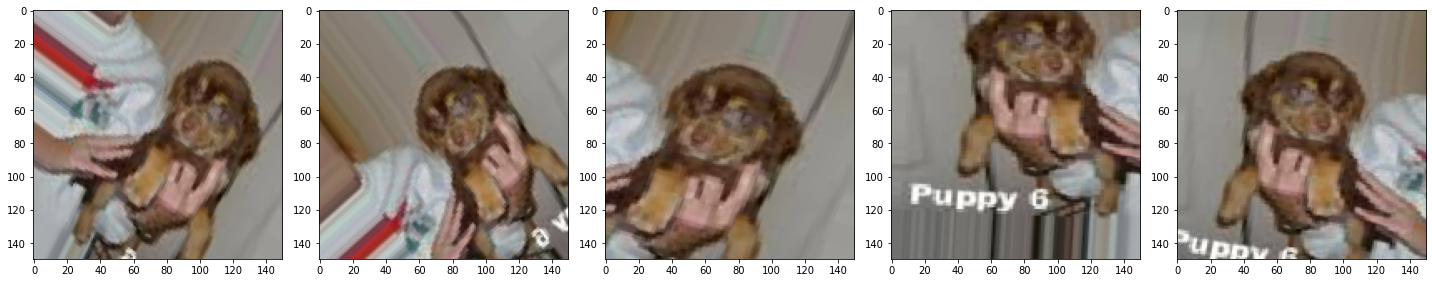

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
epochs=25
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
)

Epoch 1/25
20/20 [==============================] - 105s 5s/step - loss: 0.7127 - accuracy: 0.4870 - val_loss: 0.6918 - val_accuracy: 0.6190
Epoch 2/25
20/20 [==============================] - 104s 5s/step - loss: 0.6906 - accuracy: 0.5285 - val_loss: 0.6867 - val_accuracy: 0.5480
Epoch 3/25
20/20 [==============================] - 104s 5s/step - loss: 0.6921 - accuracy: 0.5235 - val_loss: 0.6824 - val_accuracy: 0.6260
Epoch 4/25
20/20 [==============================] - 105s 5s/step - loss: 0.6843 - accuracy: 0.5540 - val_loss: 0.6847 - val_accuracy: 0.5460
Epoch 5/25
20/20 [==============================] - 108s 5s/step - loss: 0.6710 - accuracy: 0.5705 - val_loss: 0.6706 - val_accuracy: 0.5550
Epoch 6/25
20/20 [==============================] - 104s 5s/step - loss: 0.6686 - accuracy: 0.5865 - val_loss: 0.6712 - val_accuracy: 0.5700
Epoch 7/25
20/20 [==============================] - 104s 5s/step - loss: 0.6716 - accuracy: 0.5600 - val_loss: 0.6451 - val_accuracy: 0.5890
Epoch 8/25
20

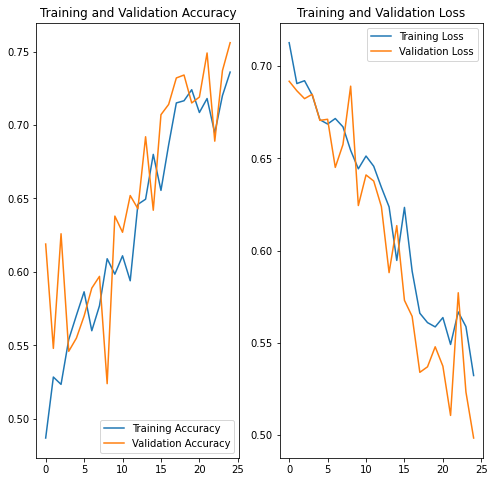

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Save a Model

In [ ]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1601539259.h5
